In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = (lats, lngs)
lat_lngs 

(array([ 55.8538526 , -79.71437089, -22.35220887, ...,  18.88284385,
        -60.47440097,  38.92269794]),
 array([-126.20101158, -159.3250257 ,  -38.85719176, ...,  -62.5423978 ,
           9.57155283,   33.37734924]))

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
print(coordinates)

[(-14.382395674975541, 140.6620270616313), (66.2941169883203, -69.43816804414126), (47.51443606595035, 176.32840947396676), (-58.95635166091201, -85.29833098108627), (39.920793338873835, 147.4974936339027), (-54.533282488647636, 104.34157659616585), (35.93397832511734, 13.854660813761228), (-88.63810893226747, -57.65433249229699), (-9.376792288098017, 39.484678303588225), (71.0776724095613, 114.87746748339657), (-21.75054316429211, 116.3098205184113), (75.68442259190601, 161.79535728159914), (79.50457263784608, -79.73701835376866), (21.61317007022653, -152.85120874052888), (3.985864908146624, 151.0796367850321), (-86.96771679195994, -132.965840662795), (11.486591799126472, -127.73753083570266), (-3.5841452714639956, 93.04500451182605), (14.841182057571388, 173.20532528831035), (12.966958509864824, 78.181918279956), (15.34965124686667, 47.71745348993622), (68.29346744736506, -32.45052715367444), (-71.52797863806579, 149.24395185438544), (-57.31910038291513, -129.2337898303838), (-6.5001

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1dad39209ae55b023467b6c52e54242


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | alyangula
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | san lawrenz
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | lindi
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | bangarapet
Processing Record 21 of Set 1 | sayyan
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | hobart
Processing Record 24 of Set 1 | kasongo-lunda
Processing Record 25

Processing Record 36 of Set 4 | yeppoon
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | linxia
Processing Record 39 of Set 4 | tawang
Processing Record 40 of Set 4 | tak
Processing Record 41 of Set 4 | lixourion
Processing Record 42 of Set 4 | okhotsk
Processing Record 43 of Set 4 | killybegs
Processing Record 44 of Set 4 | san luis
Processing Record 45 of Set 4 | saint-jerome
Processing Record 46 of Set 4 | mindelo
Processing Record 47 of Set 4 | kingori
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | hami
Processing Record 50 of Set 4 | sao jose da coroa grande
Processing Record 1 of Set 5 | asayita
City not found. Skipping...
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | avera
Processing Record 4 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 5 of Set 5 | finschhafen
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | cidreira
Processing Recor

Processing Record 24 of Set 8 | wolfsberg
Processing Record 25 of Set 8 | haldia
Processing Record 26 of Set 8 | mayenne
Processing Record 27 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 28 of Set 8 | san rafael
Processing Record 29 of Set 8 | akyab
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | coquimbo
Processing Record 32 of Set 8 | trairi
Processing Record 33 of Set 8 | damietta
Processing Record 34 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | longyearbyen
Processing Record 38 of Set 8 | havre-saint-pierre
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | mitsamiouli
Processing Record 42 of Set 8 | hunza
City not found. Skipping...
Processing Record 43 of Set 8 | taoudenni
Processing Record 44 of Set 8 | san quintin
Processing Record 45 of Set 8 | kununurr

Processing Record 10 of Set 12 | collie
Processing Record 11 of Set 12 | peterhead
Processing Record 12 of Set 12 | natal
Processing Record 13 of Set 12 | klaksvik
Processing Record 14 of Set 12 | damghan
Processing Record 15 of Set 12 | pitimbu
Processing Record 16 of Set 12 | crateus
Processing Record 17 of Set 12 | goderich
Processing Record 18 of Set 12 | andilamena
Processing Record 19 of Set 12 | horuphav
Processing Record 20 of Set 12 | huaihua
Processing Record 21 of Set 12 | vostok
Processing Record 22 of Set 12 | mouila
Processing Record 23 of Set 12 | kudat
Processing Record 24 of Set 12 | saint-joseph
Processing Record 25 of Set 12 | arroyo
Processing Record 26 of Set 12 | samusu
City not found. Skipping...
Processing Record 27 of Set 12 | le port
Processing Record 28 of Set 12 | toktogul
Processing Record 29 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 30 of Set 12 | tarauaca
Processing Record 31 of Set 12 | kuche
City not found. Skipping...
Proce

In [12]:
len(city_data)

559

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alyangula,-13.8483,136.4192,82.56,73,100,11.14,AU,2022-04-17 23:06:34
1,Iqaluit,63.7506,-68.5145,-0.31,64,71,11.01,CA,2022-04-17 23:03:56
2,Nikolskoye,59.7035,30.7861,38.71,76,100,3.78,RU,2022-04-17 23:06:35
3,Punta Arenas,-53.1500,-70.9167,46.51,87,75,9.22,CL,2022-04-17 23:06:36
4,Nemuro,43.3236,145.5750,41.65,81,52,9.24,JP,2022-04-17 23:06:36
5,Busselton,-33.6500,115.3333,55.29,75,46,3.09,AU,2022-04-17 23:06:36
6,San Lawrenz,36.0553,14.2040,55.85,80,6,3.00,MT,2022-04-17 23:06:37
7,Ushuaia,-54.8000,-68.3000,46.06,93,100,16.11,AR,2022-04-17 23:06:32
8,Lindi,-10.0000,39.7167,73.04,98,19,4.56,TZ,2022-04-17 23:06:37
9,Saskylakh,71.9167,114.0833,28.09,97,100,12.50,RU,2022-04-17 23:06:38


In [14]:
new_column_order=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df = pd.DataFrame(new_column_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alyangula,AU,2022-04-17 23:06:34,-13.8483,136.4192,82.56,73,100,11.14
1,Iqaluit,CA,2022-04-17 23:03:56,63.7506,-68.5145,-0.31,64,71,11.01
2,Nikolskoye,RU,2022-04-17 23:06:35,59.7035,30.7861,38.71,76,100,3.78
3,Punta Arenas,CL,2022-04-17 23:06:36,-53.1500,-70.9167,46.51,87,75,9.22
4,Nemuro,JP,2022-04-17 23:06:36,43.3236,145.5750,41.65,81,52,9.24
5,Busselton,AU,2022-04-17 23:06:36,-33.6500,115.3333,55.29,75,46,3.09
6,San Lawrenz,MT,2022-04-17 23:06:37,36.0553,14.2040,55.85,80,6,3.00
7,Ushuaia,AR,2022-04-17 23:06:32,-54.8000,-68.3000,46.06,93,100,16.11
8,Lindi,TZ,2022-04-17 23:06:37,-10.0000,39.7167,73.04,98,19,4.56
9,Saskylakh,RU,2022-04-17 23:06:38,71.9167,114.0833,28.09,97,100,12.50


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

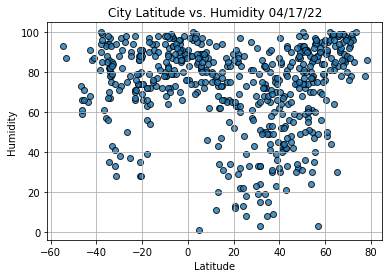

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

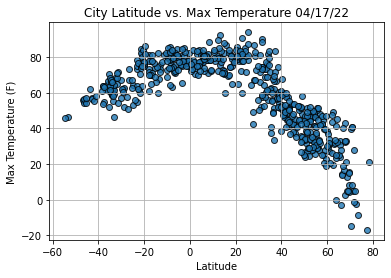

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

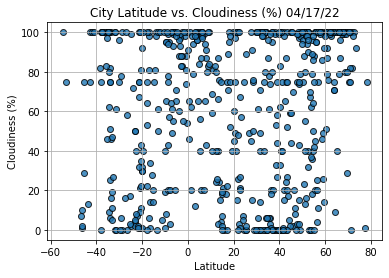

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

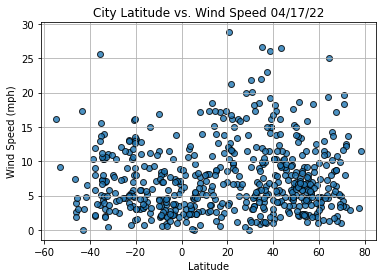

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2022-04-17 23:06:39
Lat                       19.7297
Lng                       -155.09
Max Temp                    78.28
Humidity                       89
Cloudiness                    100
Wind Speed                   6.91
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
554     True
555     True
556    False
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Iqaluit,CA,2022-04-17 23:03:56,63.7506,-68.5145,-0.31,64,71,11.01
2,Nikolskoye,RU,2022-04-17 23:06:35,59.7035,30.7861,38.71,76,100,3.78
4,Nemuro,JP,2022-04-17 23:06:36,43.3236,145.5750,41.65,81,52,9.24
6,San Lawrenz,MT,2022-04-17 23:06:37,36.0553,14.2040,55.85,80,6,3.00
9,Saskylakh,RU,2022-04-17 23:06:38,71.9167,114.0833,28.09,97,100,12.50
...,...,...,...,...,...,...,...,...,...
553,Galle,LK,2022-04-17 23:25:05,6.0367,80.2170,80.76,80,97,5.48
554,Farah,AF,2022-04-17 23:26:15,32.5000,62.5000,64.62,49,98,5.50
555,Reutlingen,DE,2022-04-17 23:26:16,48.4914,9.2043,42.76,75,3,4.83
557,Mehamn,NO,2022-04-17 23:26:16,71.0357,27.8492,40.95,87,75,19.57


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

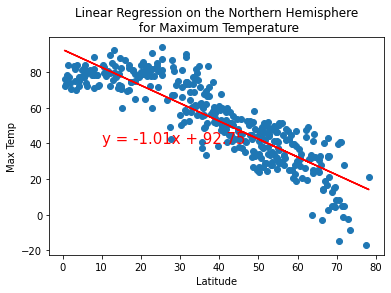

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

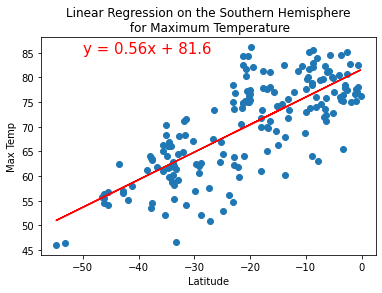

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,85))